# Mathematical Underpinnings - Lab 2

## Task 1

In [2]:
import numpy as np

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

In [3]:
def population_risk(a, sigma_eps):
    return a**2 + sigma_eps**2 + 1 - 2*a

### b)

In [4]:
# sampling
n = 50
sigma_squared = 1
X = np.random.randn(n)

In [5]:
eps = np.sqrt(sigma_squared)*np.random.randn(n)
Y = X + eps

In [6]:
np.random.seed(123)

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [7]:
def empirical_risk(a, x, y):
#     n = len(X)
#     return 1/n * sum((a*x-y)**2)
    return np.sum((a*x-y)**2)/y.shape[0]

### c)

In [8]:
# code, plot
import matplotlib.pyplot as plt

In [9]:
a_grid = np.arange(1/2,1.5, 0.01)
R_population = [population_risk(a, sigma_squared) for a in a_grid]
R_empirical = [empirical_risk(a, X, Y) for a in a_grid]

In [10]:
R_pop_min = min(R_population)
R_emp_min = min(R_empirical)
R_pop_a_min = a_grid[np.where(R_population == R_pop_min)][0]
R_emp_a_min = a_grid[np.where(R_empirical == R_emp_min)][0]
R_pop_empamin = population_risk(R_emp_a_min, sigma_squared)

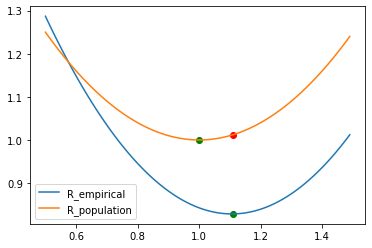

In [11]:
#plt.scatter(a_grid, R_empirical)
plt.plot(a_grid, R_empirical, label='R_empirical')
plt.plot(a_grid, R_population, label='R_population')
plt.scatter(R_pop_a_min, R_pop_min, c="green")
plt.scatter(R_emp_a_min, R_emp_min, c="green")
plt.scatter(R_emp_a_min, R_pop_empamin, c="red")
plt.legend()

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [12]:
# excess risk
L = 200
R_excess = 0
n = 500

for l in range(L):
    
    X = np.random.randn(n)
    eps = np.sqrt(sigma_squared)*np.random.randn(n)
    Y = X + eps

    a_grid = np.arange(1/2,1.5, 0.01)
    R_population = [population_risk(a, sigma_squared) for a in a_grid]
    R_empirical = [empirical_risk(a, X, Y) for a in a_grid]

    R_pop_min = min(R_population)
    R_emp_min = min(R_empirical)
    R_pop_a_min = a_grid[np.where(R_population == R_pop_min)][0]
    R_emp_a_min = a_grid[np.where(R_empirical == R_emp_min)][0]
    R_pop_empamin = population_risk(R_emp_a_min, sigma_squared)
    R_excess += R_pop_empamin - R_pop_min
R_excess = R_excess/L

In [13]:
R_excess

0.0017660000000000186

In [39]:
# simulations with fixed sample size

In [276]:
# simulations for various sample sizes

In [40]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)